# Project Titanic - Machine Learning from Disaster

# Table of Content

* [1. Introduction](#introduction)
* [2. Loading Data](#loading-data)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#fe-dw)
* [5. Model Training](#model-training)

# 1. Introduction <a class = 'anchor' id = 'introduction'></a>

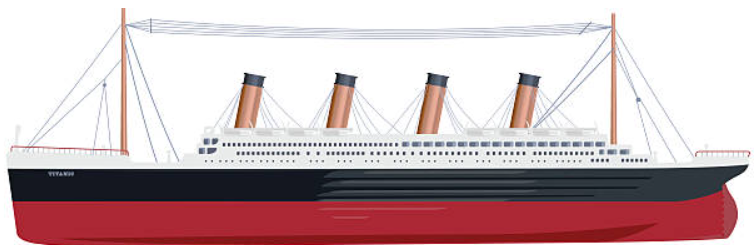

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, I will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (name, age, gender, socio-economic class, etc).

In this project, I work with two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

# 2. Loading the Data <a class = 'anchor' id = 'loading-data'></a>

In [1]:
#import Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Note
 - `sibsp`:	# of siblings / spouses aboard the Titanic
 - `parch`:	# of parents / children aboard the Titanic
 - `ticket`: Ticket number
 - `cabin`:	Cabin number
 - `embarked`: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace = True)

#set cột index thành cột PassengerId

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis = 1, inplace = True)

# axis là drop cả cái columns đó
# inplace = True là thực hiện trên bảng đó luôn kh cần tạo biến mới

In [9]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

# index_col là set cột index theo column trong bộ dataset

In [11]:
test_df.tail()

#tail là xem những hàng dưới cùng

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Feature Classification: Categorical vs Numerical
    - This help us select the appropriate plots for viz
    
### Which features are categorical?
    - Categorical Features: Nominal, Ordinal, ratio, interval
    - to classify the samples into sets of similar samples
    
### Which features are numerical?
    - Numerical features: discrete (rời rạc), continous(liên tục), timeseries
    - these values change from sample to sample

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived, Sex, Embarked, Pclass(ordinal), SibSp, Parch
- Numerical: (continnous)Age, Fare (discrete)
- Mix type of data: Ticket, Cabin
- Contain Error/Typo: Name
- Blank or Null: Cabin > Age > Embarked
- Various Data Type: String, Float, Int

In [14]:
train_df['Survived'] = train_df['Survived'].astype('category') 

# astype: chuyển đổi kiểu dữ liệu

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [16]:
features =  ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Distribution of Numerical feature values across the sample

In [18]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution  of Categorical feature

In [19]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis ( EDA) <a class = 'anchor' id = 'eda'></a>

## Correlating categorical features
    - Categorical: Survived, Sex, Embarked, Pclass(ordinal), SibSp, Parch
    
## Target Variable: Survived

In [20]:
train_df['Survived'].value_counts().to_frame()

# value_counts(): đếm số giá trị của 1 giá trị cụ thể 
# to_frame(): tạo 1 bảng chứa giá trị

,Survived
0,549
1,342


In [21]:
train_df['Survived'].value_counts(normalize = True).to_frame()

# normalize = True: tính %

,Survived
0,0.616162
1,0.383838


Chỉ có 38% số người sống sót sau vụ thảm họa. imbalance data

## Sex

In [22]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [23]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


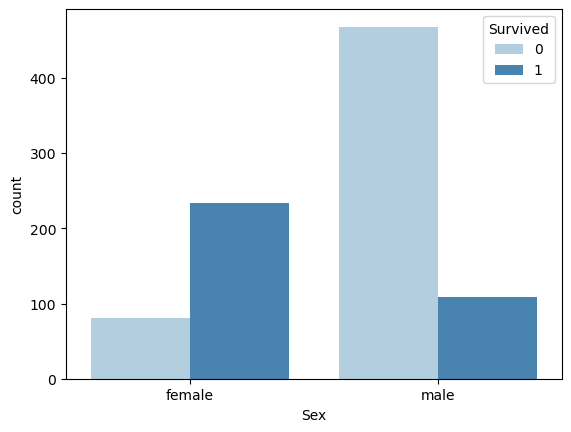

In [24]:
sns.countplot(data = train_df, x ='Sex', hue = 'Survived', palette = 'Blues');

# countplot(data = dataframe , x = columns): đếm giá trị bằng biểu đồ
# palette: dùng theme
# hue: so sánh với giá trị khác 

Tỉ lệ sống sót của nữ cao hơn nam. Điều này dẫn đến nguyên nhân sau
- Khi xảy ra sự cố đội cứu hộ tàu ưu tiên cứu nữ, trẻ em và người già rồi sau đó mới đến nam giới

## Remaining Categorical Feature Columns

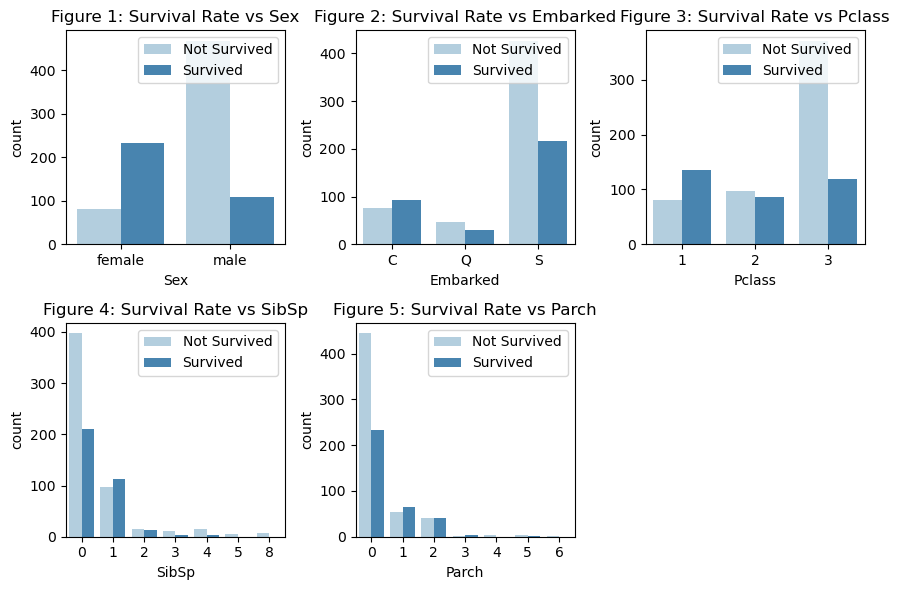

In [94]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_cols = 3
n_rows = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize =(9, 6))

# Tạo subplot với 3 columns và 2 rows với chiều rộng 9 và chiều cao 6

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i <len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
            
plt.tight_layout() # tối ưu hóa khoảng cách giữa các subplot
fig.delaxes(ax[1, 2]) #delete specific subplot

## EDA for Numerical  Feature
 - Numerical: (continnous)Age, Fare (discrete)

### Age

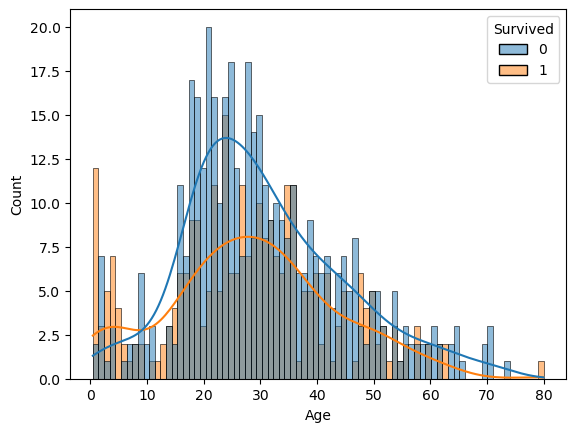

In [27]:
sns.histplot(data = train_df, x = 'Age',hue='Survived', bins = 80, kde = True);

# bins: chia bao nhiêu khoảng (bins = 40 chia làm 40 khoảng)

- Tỉ lệ tử vong cao đối với độ tuổi từ 18-48 tuổi
- Tỉ lệ sống sót cao đối với trẻ em dưới 10 tuổi

### Fare

In [28]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

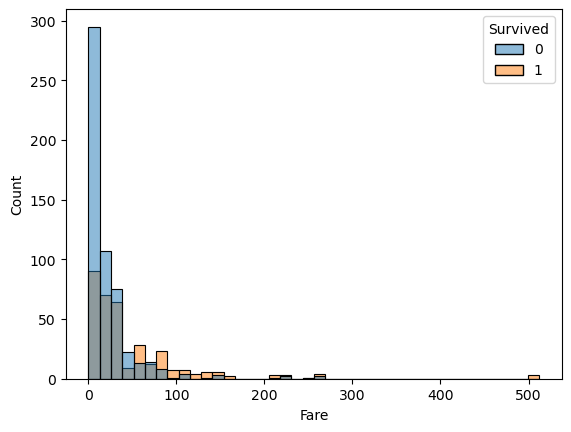

In [29]:
sns.histplot(data= train_df, x= 'Fare', hue = 'Survived', bins = 40);

- Biểu đồ chưa thể hiện rõ những giá vé cao vì giá vé cao chỉ chiếm 1 phần nhỏ trong bộ data -> chia giá vé theo quartile

In [97]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_cate = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'],4, labels = fare_cate)

#pd.cut():chuyển đổi dữ liệu số thành dữ liệu phân loại bằng cách phân chia các giá trị thành các khoảng rời rạc dựa trên các quantile hoặc rank

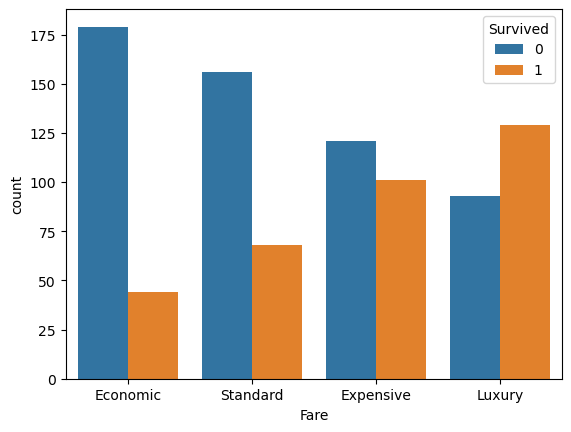

In [31]:
sns.countplot(x= quartile_data, hue =train_df ['Survived'] );

- Đối với hành khách có giá vé Q1,Q2: tỉ lệ sống sót sẻ tương đối thấp
- Đối với hành khách có giá vé Q3: Tỉ lệ sống sót và tử vong tương đương nhau
- Đối với hành khách có giá vé Q4: Tỉ lệ sống sót cao hơn tỉ lệ tử vong

`-> khi sự cố xảy ra những người ở những hạng vé cao sẽ được đội cứu hộ ưu tiên trước và thứ tự ưu tiên sẽ giảm dần qua từng hạng vé`

# 4. Feature Engineering and Data Wrangling <a class = 'anchor' id = 'fe-dw'></a>

## FE: Name

- regular expression

In [32]:
train_df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [33]:
import re #regular expression mudule

def extract_title(name):
    p = re.compile(r',(.+)\.') #dùng web regex101
    return p.search(name).groups(1)[0].strip()
    
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [34]:
train_df['Title'].value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [35]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name'] #debug error pattern 

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [36]:
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    #if p.search(name) is None:
        #print(name)
    return p.search(name).groups(1)[0].strip()
    
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [37]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [38]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [39]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [40]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'


train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [41]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

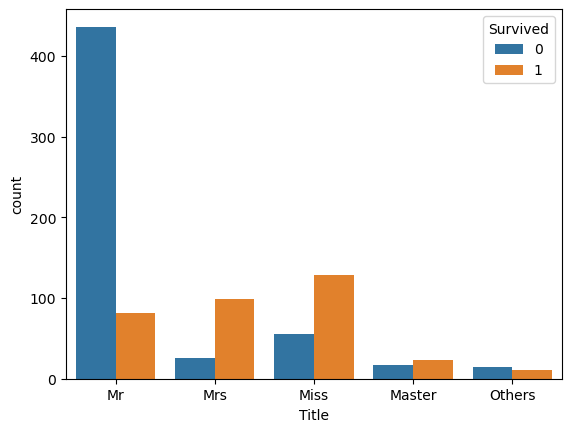

In [42]:
sns.countplot(data = train_df, x='Title',hue = 'Survived');

## FE: Family

- `SibSp`, `Parch`

In [43]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') +1

In [44]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') +1

In [98]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins = [0,1,4,6,11], labels = ['Single', 'Small', 'Medium', 'Large'])

In [99]:
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins = [0,1,4,6,11], labels = ['Single', 'Small', 'Medium', 'Large'])

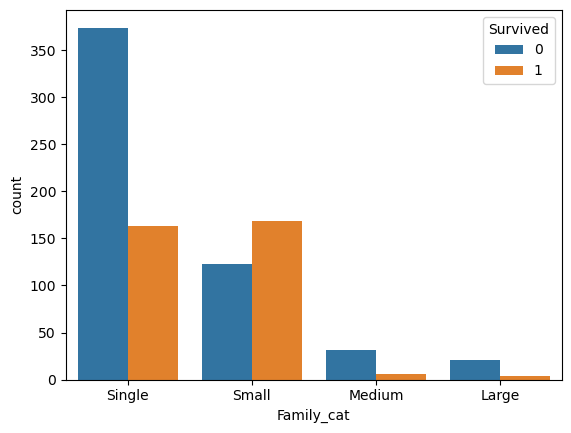

In [100]:
sns.countplot(data = train_df, x = 'Family_cat', hue = 'Survived');

## Data Wrangling

In [48]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [49]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f'col {col} has {missing_count} missing_values.')

display_missing(train_df, feature_cols)

col Age has 177 missing_values.
col Embarked has 2 missing_values.


In [50]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f'col {col} has {missing_count*100/n_rows:.2f}% missing_values.')
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

col Age has 19.87% missing_values.
col Embarked has 0.22% missing_values.
col Age has 20.57% missing_values.
col Fare has 0.24% missing_values.


### Filling missing values

In [101]:
#Filling missing values with `median` of whole dataset
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

In [52]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [53]:
# Filling the missing values in Age with the medians of Sex and Pclass group

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [54]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [55]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

col Embarked has 0.22% missing_values.
col Fare has 0.24% missing_values.


# 5. Model Training <a class = 'anchor' id = 'model-training'></a>

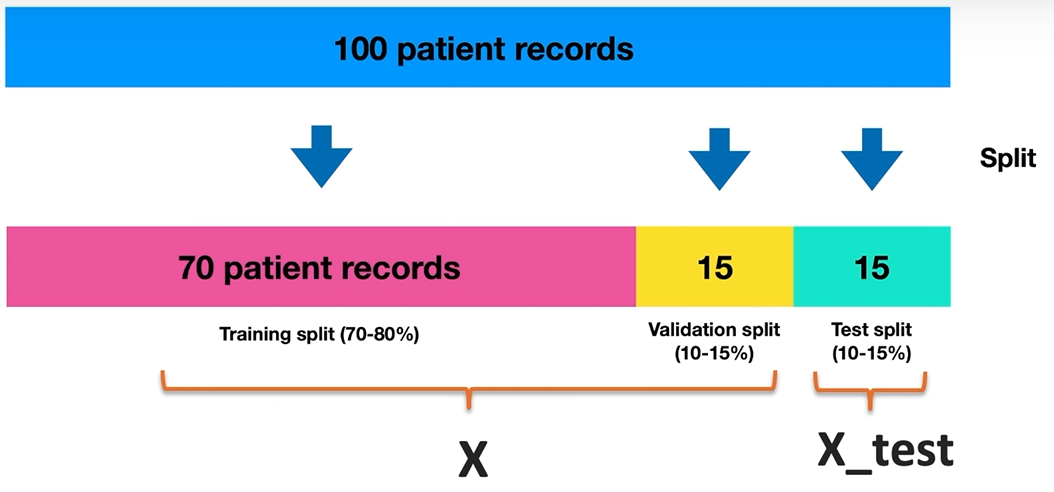
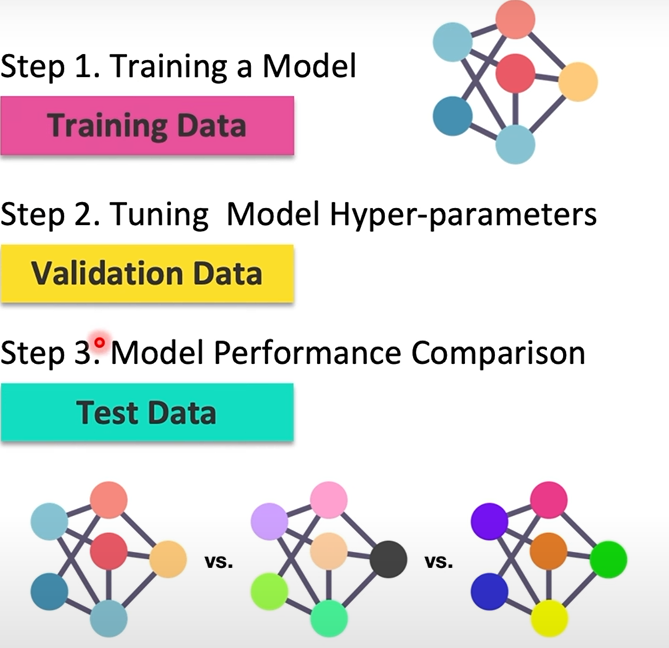


In [56]:
x = train_df[feature_cols]
y = train_df['Survived']

In [57]:
x_test = test_df[feature_cols]

In [58]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('inputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('inputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [59]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [60]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [61]:
x = preprocessor.transform(x) # x -> x_train x_val

In [62]:
x_test = preprocessor.transform(x_test)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [65]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [66]:
x_test.shape

(418, 19)

In [67]:
# binary classification:  is the task of classifying the elements of a set into two groups (each called class) on the basis of a classification rule.

from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [68]:
log_reg = LogisticRegression(solver ='liblinear', max_iter = 1000 )
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [69]:
log_reg.score(x_val, y_val)

0.88268156424581

In [70]:
y_pred = log_reg.predict(x_val)

In [71]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8857142857142857, 0.8266666666666667)

In [72]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       104
           1       0.89      0.83      0.86        75

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.88      0.88      0.88       179



- y = ax1 + bx2 +bias -> y = ax1^2 + bx2^2 + cx1x2 + bias -> dùng PolynomialFeatures

In [73]:
poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_feature_x_val = poly.transform(x_val)

In [74]:
poly_log_reg = LogisticRegression(solver ='liblinear', max_iter = 1000 )
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [75]:
poly_log_reg.score(poly_feature_x_val, y_val)

0.8659217877094972

In [76]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2023)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2023)

In [77]:
decision_tree.score(x_val, y_val)

0.8100558659217877

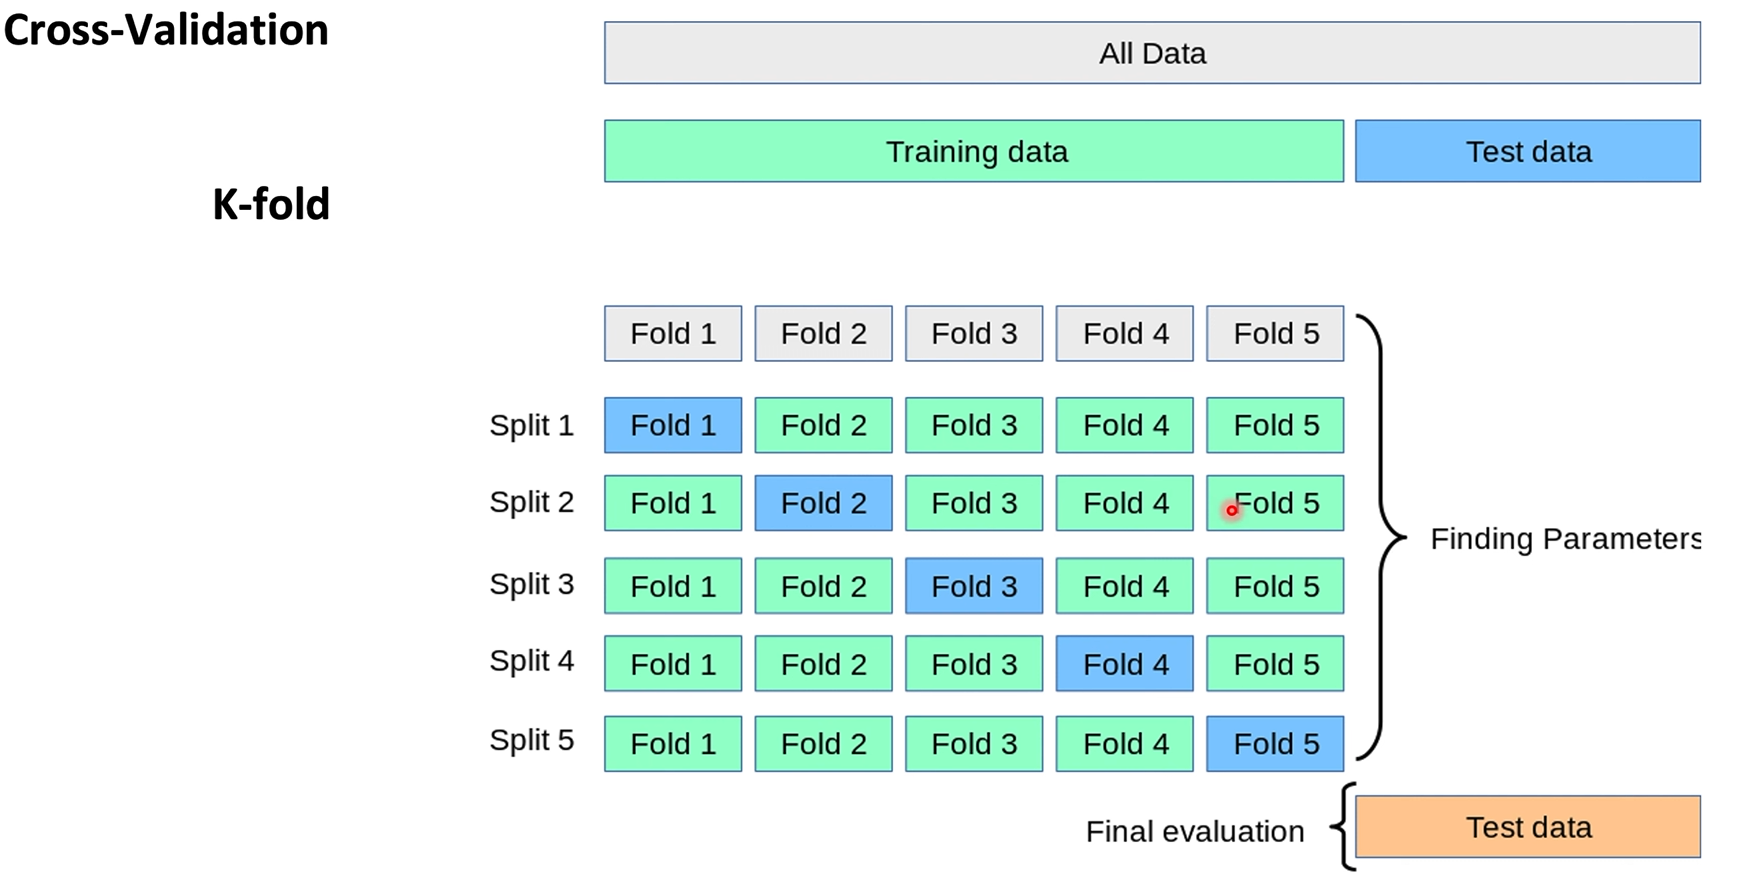

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
log_reg_cv = LogisticRegression(solver ='liblinear', max_iter = 1000 )
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2023)
lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)

In [80]:
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [81]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [82]:
dt_scores = cross_val_score(dt_cv, x, y, scoring = 'accuracy', cv = 5)

In [83]:
dt_scores.mean(), dt_scores.std()

(0.8058690603226415, 0.01719257924007743)

## Baseline Model Comparison
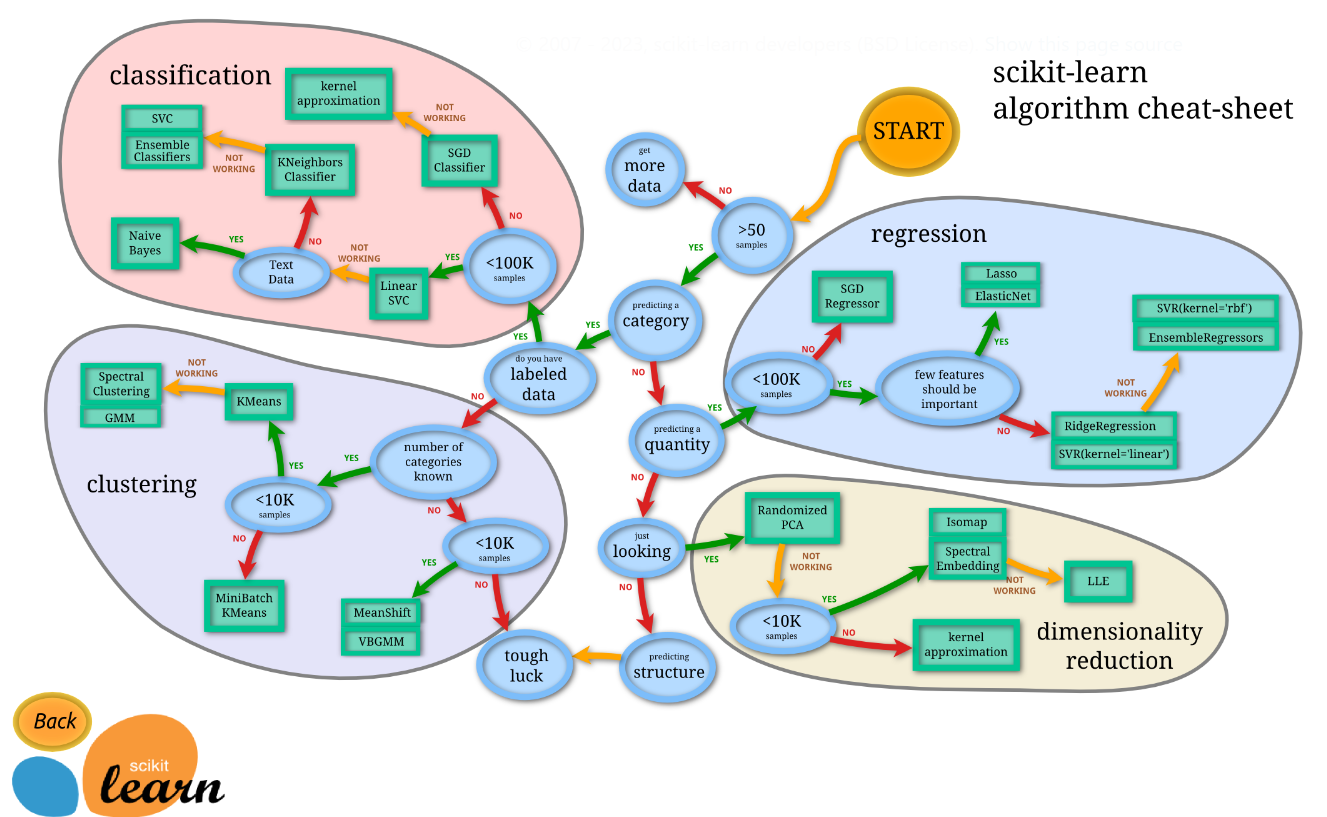

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost
seed = 2023
models = [
    LinearSVC(max_iter = 12000,random_state = 2023),
    SVC(random_state = 2023),
    KNeighborsClassifier(metric = 'minkowski', p = 2),
    LogisticRegression(solver ='liblinear', max_iter = 1000 ),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = seed)
]

In [86]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x,y, metrics, cv = 5, plot_results = False):
    #define k-fold:
    kfold = StratifiedKFold(cv, shuffle = True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y = 'accuracy_score', data = cv_df, color = 'lightblue', showmeans = True)
        plt.title('Boxplot of Base-line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation = 45)
        plt.show()
        
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index =True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending= False, inplace = True)
    
    return baseline_results
        
generate_baseline_results(models, x,y, metrics = 'accuracy', cv = 5, plot_results = False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
XGBClassifier,0.831624,0.015685
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.806930,0.023282
DecisionTreeClassifier,0.794608,0.016252
